<a href="https://colab.research.google.com/github/srmty09/Implemented-Papers/blob/main/LeNet_pytorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Librarys

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1,padding=2)
    self.relu=nn.ReLU()
    self.pool=nn.AvgPool2d(kernel_size=2,stride=2)
    self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1)
    self.fc1=nn.Linear(in_features=16*5*5,out_features=120)
    self.fc2=nn.Linear(in_features=120,out_features=84)
    self.fc3=nn.Linear(in_features=84,out_features=10)

  def forward(self,x):
    x=self.pool(self.relu(self.conv1(x)))
    x=self.pool(self.relu(self.conv2(x)))
    x=x.view(-1,16*5*5)
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [ ]:
import torchsummary as summary

In [ ]:
model=LeNet5()
summary.summary(model,(1,28,28),device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                  [-1, 120]          48,120
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

In [ ]:
batch_size=64
epochs=10
learning_rate=0.001

Data loader and Transformation

In [ ]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform) # Changed transforms to transform
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)   # Changed transforms to transform

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.15MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.67MB/s]


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=LeNet5().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
train_losses,test_accuracy=[],[]
for epoch in range(epochs):
  model.train()
  running_loss=0.0
  for images,labels in train_loader:
    images,labels=images.to(device),labels.to(device)
    optimizer.zero_grad()
    output=model(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  train_losses.append(running_loss/len(train_loader))
  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

  model.eval()
  correct,total=0,0
  with torch.no_grad():
    for images,labels in test_loader:
      images,labels=images.to(device),labels.to(device)
      outputs=model(images)
      _,predicted=torch.max(outputs.data,1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()
  test_accuracy.append(100*correct/total)
  print(f"Test Accuracy: {100*correct/total}%")

Epoch 1/10, Loss: 0.2933939063409244
Test Accuracy: 96.87%
Epoch 2/10, Loss: 0.08471728556715985
Test Accuracy: 98.19%
Epoch 3/10, Loss: 0.05987613167013548
Test Accuracy: 98.59%
Epoch 4/10, Loss: 0.04665569441818964
Test Accuracy: 98.55%
Epoch 5/10, Loss: 0.038623214569756946
Test Accuracy: 98.68%
Epoch 6/10, Loss: 0.03360405019663179
Test Accuracy: 98.61%
Epoch 7/10, Loss: 0.028786181882270792
Test Accuracy: 98.56%
Epoch 8/10, Loss: 0.024390543496186808
Test Accuracy: 98.98%
Epoch 9/10, Loss: 0.02172650497000943
Test Accuracy: 98.77%
Epoch 10/10, Loss: 0.017957344569844755
Test Accuracy: 98.83%


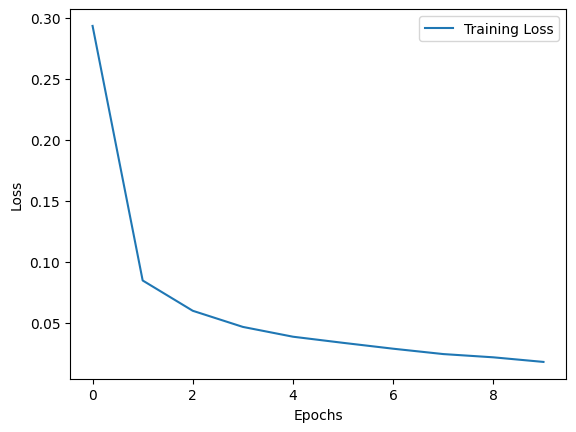

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

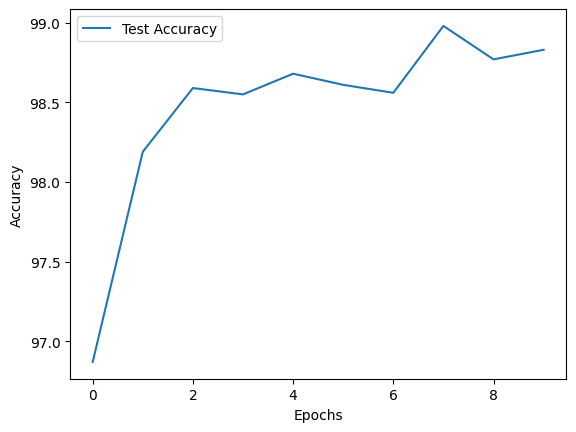

In [ ]:
plt.plot(test_accuracy,label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_image(image):
  with torch.no_grad():
    image=image.to(device)
    output=model(image)
    _,predicted=torch.max(output.data,1)
    return predicted.item()

In [ ]:
for i in test_loader:
  images,labels=i
  break

In [ ]:
for i in range(len(images)):
  print(f"{predict_image(images[i].unsqueeze(0))}--->{labels[i]}")

7--->7
2--->2
1--->1
0--->0
4--->4
1--->1
4--->4
9--->9
5--->5
9--->9
0--->0
6--->6
9--->9
0--->0
1--->1
5--->5
9--->9
7--->7
8--->3
4--->4
9--->9
6--->6
6--->6
5--->5
4--->4
0--->0
7--->7
4--->4
0--->0
1--->1
3--->3
1--->1
3--->3
4--->4
7--->7
2--->2
7--->7
1--->1
2--->2
1--->1
1--->1
7--->7
4--->4
2--->2
3--->3
5--->5
1--->1
2--->2
4--->4
4--->4
6--->6
3--->3
5--->5
5--->5
6--->6
0--->0
4--->4
1--->1
9--->9
5--->5
7--->7
8--->8
9--->9
3--->3
